In [ ]:
!pip install scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data.tsv', sep='\t')

In [ ]:
df['label'].value_counts()
# from the result we can see that the data is very unbalanced 

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
# ham is a message that is not spam, but since it is very large in number as 
# compared to spam, therefore, we will balance this by taking same number of
# ham data as of spam

In [ ]:
ham = df[df['label']=='ham']

In [ ]:
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [ ]:
spam = df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [ ]:
# Randomly selecting ham data equal to spam data

In [ ]:
ham = ham.sample(spam.shape[0])

In [ ]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [ ]:
whole_data = ham.append(spam, ignore_index=True)

In [ ]:
whole_data.head()

,label,message,length,punct
0,ham,"Sir, I have been late in paying rent for the p...",372,13
1,ham,Check wid corect speling i.e. Sarcasm,37,2
2,ham,Probably earlier than that if the station's wh...,63,1
3,ham,"Sorry, I'll call later",22,2
4,ham,Bring tat cd don forget,23,0


In [ ]:
whole_data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


Exploratory Data Analysis

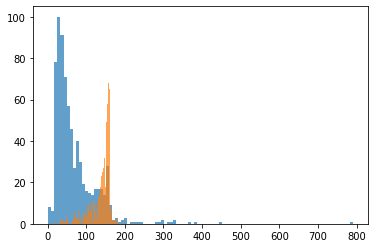

In [ ]:
plt.hist(whole_data[whole_data['label']=='ham']['length'], bins = 100, alpha = 0.7)
plt.hist(whole_data[whole_data['label']=='spam']['length'], bins = 100, alpha = 0.7)
plt.show()
# Therefore, this can be a useful information to classify between ham and spam messages

Data Preparation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn. feature_extraction.text import TfidfVectorizer

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(whole_data['message'], whole_data['label'], test_size = 0.3, random_state=0, shuffle = True, stratify = whole_data['label'])

Performing TF-IDF for creation of Bag of Words

In [ ]:
vectorizer = TfidfVectorizer()


In [ ]:
X_train = vectorizer.fit_transform (X_train)

## Pipline and Random Forest Classifier

In [ ]:
# first run row 48 and then directly run this row
clf = Pipeline ([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier (n_estimators=100, n_jobs=-1))])
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [ ]:
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[223,   2],
       [ 22, 202]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       225
        spam       0.99      0.90      0.94       224

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [ ]:
accuracy_score(y_test, y_pred)

0.9465478841870824

Now, we test this on some real messages

In [ ]:
clf.predict(["Hey, I an Anuj"])

array(['ham'], dtype=object)

In [ ]:
clf.predict(["Congratulations, You have won a free ticket to Thailand. Reply with 'WON' to 445566 "])

array(['spam'], dtype=object)

In [ ]:
clf.predict(["you have won tickets in USA"])

array(['ham'], dtype=object)

## **SVM**
Now predicting it using SVM

In [ ]:
clf = Pipeline ([('tfidf', TfidfVectorizer()), ('clf', SVC(C= 1000, gamma= 'auto'))])
clf.fit (X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', SVC(C=1000, gamma='auto'))])

In [ ]:
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[217,   8],
       [ 18, 206]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.96      0.94       225
        spam       0.96      0.92      0.94       224

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [ ]:
accuracy_score(y_test, y_pred)


0.9420935412026726

In [ ]:
clf.predict(["Hey, I an Anuj"])

array(['ham'], dtype=object)

In [ ]:
clf.predict(["Congratulations, You have won a free ticket to Thailand. Reply with 'WON' to 445566 "])

array(['spam'], dtype=object)

In [ ]:
clf.predict(["you have won tickets in USA"])

array(['ham'], dtype=object)